# Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing SentenceTransformer and LIME

In [3]:
!pip install -U sentence-transformers
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 4.4 MB 15.9 MB/s 
     |████████████████████████████████| 1.2 MB 65.6 MB/s 
     |████████████████████████████████| 101 kB 11.3 MB/s 
     |████████████████████████████████| 596 kB 41.5 MB/s 
     |████████████████████████████████| 6.6 MB 32.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6648493b5a03cc397ae20a341316bf8ec9e32500fcacf7539b0b61faee217059
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-

# Importing libraries

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from PIL import Image
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from lime.lime_text import LimeTextExplainer

# Reading datasets from drive

In [5]:
dataSet1 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/article_and_tweets_with_cleaning.csv', sep = ",")
dataSet2 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/article_and_tweets_without_cleaning.csv', sep = ",")
dataSet3 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/tweets_with_cleaning.csv', sep = ",")
dataSet4 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/tweets_without_cleaning.csv', sep = ",")
dataSet_array = [dataSet1, dataSet2, dataSet3, dataSet4]

# Experiment

------------------------------------------------------------
!!!!!  sub-experiment with SVM model number 1: 
!!!!!  dataset used is : article and tweets with cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 9885, True: 9862})
     In testing: Counter({True: 1109, False: 1086})


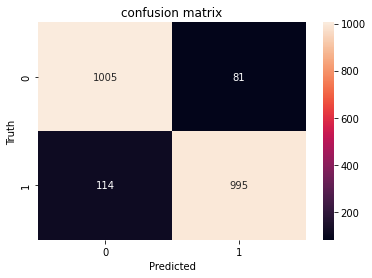

              precision    recall  f1-score   support

       False       0.90      0.93      0.91      1086
        True       0.92      0.90      0.91      1109

    accuracy                           0.91      2195
   macro avg       0.91      0.91      0.91      2195
weighted avg       0.91      0.91      0.91      2195

             !!!!!  split number : 2  !!!!!
     In training: Counter({True: 9898, False: 9849})
     In testing: Counter({False: 1122, True: 1073})


KeyboardInterrupt: ignored

In [6]:
sub_experiment_count = 1
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0
for dataSet in dataSet_array:
  dataSet_text = dataSet['text']
  dataSet_label = dataSet['label']
  sub_accuracy  = 0
  sub_recall    = 0
  sub_f1_score  = 0
  sub_precision = 0
  print('------------------------------------------------------------')
  #some output
  if sub_experiment_count == 1:
    print('!!!!!  sub-experiment with SVM model number 1: ')
    print('!!!!!  dataset used is : article and tweets with cleaning  !!!!!')
  elif sub_experiment_count == 2:
    print('!!!!!  sub-experiment with SVM model number 2: ')
    print('!!!!!  dataset used is : article and tweets without cleaning  !!!!!')
  elif sub_experiment_count == 3:
    print('!!!!!  sub-experiment with SVM model number 3: ')
    print('!!!!!  dataset used is : tweets with cleaning  !!!!!')
  elif sub_experiment_count == 4:
    print('!!!!!  sub-experiment with SVM model number 4: ')
    print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
  print('------------------------------------------------------------')

  #cross validation counter
  split = 1
  kfold = KFold(n_splits=10, shuffle=True)
  
  #cross validation loop
  for train, test in kfold.split(dataSet_text, dataSet_label):
    
    #convert the vectors to np array
    training_padded = np.array(dataSet_text[train])
    training_labels = np.array(dataSet_label[train])
    testing_padded  = np.array(dataSet_text[test])
    testing_labels  = np.array(dataSet_label[test])

    #some output
    print('             !!!!!  split number : '+ str(split) + '  !!!!!')
    print('     ' + f'In training: {Counter(training_labels)}')
    print('     ' + f'In testing: {Counter(testing_labels)}')

    #creat SVM model 
    model = Pipeline([('tfidf',TfidfVectorizer()), ('clf', SVC(probability=True)),])
    #fit the model
    model.fit(training_padded, training_labels)
    #get the predicted lable
    lable_predicted = model.predict(testing_padded)
    
    
    #create and show the confusion matrix
    cm = metrics.confusion_matrix(testing_labels, lable_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('confusion matrix')
    plt.show()

    #show the classification report 
    print(metrics.classification_report(testing_labels, lable_predicted))

    #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
    sub_accuracy  = sub_accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
    sub_recall    = sub_recall + metrics.recall_score(testing_labels, lable_predicted)
    sub_f1_score  = sub_f1_score + metrics.f1_score(testing_labels, lable_predicted)
    sub_precision = sub_precision + metrics.precision_score(testing_labels, lable_predicted)

    #indexing
    split = split + 1

  #compute the mean of the using metrics in the cross val.
  sub_accuracy  = sub_accuracy / 10
  sub_recall    = sub_recall / 10
  sub_f1_score  = sub_f1_score / 10
  sub_precision = sub_precision / 10

  #some output
  print("mean accuracy for this sub_experiment is " + str(round(sub_accuracy, 2)))
  print("mean recall for this sub_experiment is " + str(round(sub_recall, 2)))
  print("mean precision for this sub_experiment is " + str(round(sub_precision, 2)))
  print("mean f1_score for this sub_experiment is " + str(round(sub_f1_score, 2)))

  #add the new metrics result from the new sub experiment to the old  metrics result from the old sub experiments
  accuracy  = accuracy + sub_accuracy
  recall    = recall + sub_recall
  precision = precision + sub_precision
  f1_score  = f1_score + sub_f1_score
  
  #indexing
  sub_experiment_count = sub_experiment_count + 1

#compute the mean of the using metrics for the 4 sub experiments.
accuracy  = accuracy / 4
recall    = recall / 4
f1_score  = f1_score / 4
precision = precision / 4

#some output
print('---------------------------------------------------------')
print('                   End of Experiment')
print('---------------------------------------------------------')

print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))

# LIME

In [7]:
# this index is for this tweet 'Google Hyderabad begins screening employees' 
# but when we run the code again we will get another tweet because of the cross
# validation (cross validation make randomly splits)
idx = 685

# get the classes values as list
class_names=list(dataSet_label[train].unique())
# creal the LIME explainer 
explainer = LimeTextExplainer(class_names=["fake","true"])
exp = explainer.explain_instance( dataSet_text[test].iloc[idx], model.predict_proba, num_features=250)

# some output
print('Document id: %d' % idx)
print('Predicted class =', lable_predicted[idx])
print('True class: %s' % dataSet_label[test].iloc[idx])

AttributeError: ignored

In [8]:
# get the weight for each word in this tweet 'Google Hyderabad begins screening employees'
print ('\n'.join(map(str, exp.as_list(label=1))))

NameError: ignored

In [9]:
# plot the LIME explainer
exp.show_in_notebook(text=True)

NameError: ignored

# Wordcloud

In [10]:
# Find the words that have the greatest impact on the model and put them in 2 lists to use them in the word clouds.
# The first list is for true news
# The second list is for fake news  
true_texts = []
false_texts = []
for idx in range (0,len(dataSet_text[test])):
  class_names=list(dataSet_label[train].unique())
  explainer = LimeTextExplainer(class_names=["fake","true"])
  exp = explainer.explain_instance( dataSet_text[test].iloc[idx], model.predict_proba, num_features=250)
  exp_list = exp.as_list(label=1)
  text = ''
  
  if lable_predicted[idx] == True:
    for i in range (0,4):
      if len(exp_list) == 0:
        continue
      word = exp_list.pop(exp_list.index(max(exp_list,key=lambda item:item[1])))
      if len(text) == 0:
        text = word[0]
      else:
        text = text + ' ' + word[0]
    true_texts.append(text)
  else:
    for i in range (0,4):
      if len(exp_list) == 0:
        continue
      word = exp_list.pop(exp_list.index(min(exp_list,key=lambda item:item[1])))
      if len(text) == 0:
        text = word[0]
      else:
        text = text + ' ' + word[0]
    false_texts.append(text)

AttributeError: ignored

In [11]:
# convert the 2 list to strings 
true_text = ' '.join(true_texts)
false_text = ' '.join(false_texts)

In [12]:
# help method for world cloud coloring 
def transform_format(val):
    if val ==0 :
        return val
    else:
        return 255

In [13]:
# create the world cloud for the true news in fourth dataset
wc = WordCloud(background_color="white", max_words=1000, contour_width=4, contour_color='skyblue', min_font_size = 5, max_font_size = 50)

wc.generate(true_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: ignored

In [14]:
# create the world cloud for the fake news in fourth dataset
wc = WordCloud(background_color="white", max_words=1000, contour_width=4, contour_color='skyblue', min_font_size = 5, max_font_size = 50)

wc.generate(false_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: ignored